<table class="table table-bordered">
    <tr>
        <th style="width:250px;">
            <img src='./images/RISE_FFS_2_Light BG@4x.png' style="background-color:white; width: 100%; height: 100%; padding: 20px">
        </th>
        <th style="text-align:center;">
            <h1>Estimators and Estimates - Part 1</h1>
            <h3>IBF TFIP</h3>
        </th>
    </tr>
</table>

<a id=contentpage></a>
### Objectives
After completing this practical exercise, you should be able to understand:
- [1: Sampling Distribution](#a)
- [2: Central Limit Theorem](#b)
- [3: Confidence Intervals (Mean)](#c)
- [4: Confidence Intervals (Mean- small samples)](#d)
- [5: Confidence Intervals (Proportion)](#e)


<a id="a"></a>
##  1. Sampling Distribution
Here we will simulate taking multiple samples to create a sample mean distribution from a normal population of male adlults, that has a mean weight of 65kg and a standard deviation of 12kg.

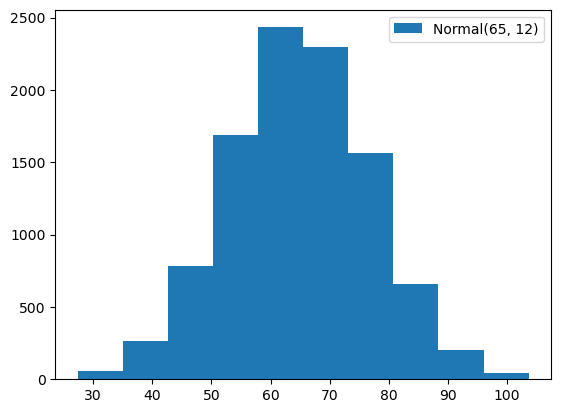

In [1]:
# construct  a normal distribution assuming it is a population of N = 10000
import numpy as np
import matplotlib.pyplot as plt
popln = np.random.normal(65,12, 10000)
plt.hist(popln, label="Normal(65, 12)")
plt.legend()
plt.show()

In [2]:
# Suppose we collect a sample of size n
import random
import numpy as np
# Take a sample of size 5 from pdf_normal, find the mean of the sample, and add it to the list of sample means.
# Repeat the loop 1000 times
sampl = []
for i in range(1000):
    sampl.append(np.mean(np.random.choice(popln,5)))

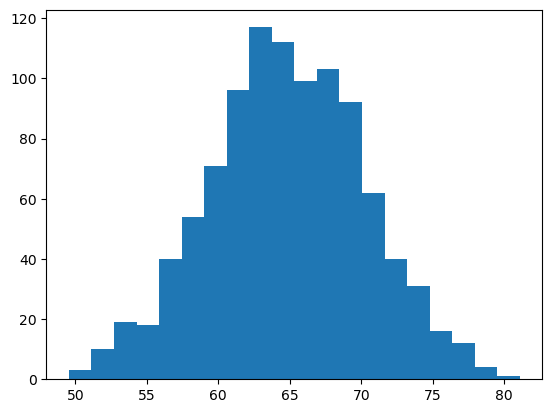

In [3]:
# print the histogram for the sample mean distribution
plt.hist(sampl, bins = 20)
plt.show()


#### (a) Calculate the sample mean ($\bar{X}$) and standard error of the sample mean distribution
#### (b) Calculate the population mean ($\mu$) and standard deviation ($\sigma^2$)
#### (c) What do you observe about the sample mean ($\bar{X}$) and standard error?


In [4]:
# Ans (a):
sampl_mean = np.mean(sampl)
sampl_sd = np.std(sampl)
sampl_var = np.var(sampl)
print(f"Sample mean: {sampl_mean}")
print(f"Standard error of sample mean: {sampl_sd}, sampl var: {sampl_var}")
# The sampl var should be close to the 28.8

Sample mean: 64.82664611295375
Standard error of sample mean: 5.416329658926298, sampl var: 29.336626974164666


In [5]:
# Ans (b):
popln_mean = np.mean(popln)
popln_sd = np.std(popln)
print(f"Population mean: {popln_mean}")
print(f"Population standard deviationn: {popln_sd}")

Population mean: 64.84170087740912
Population standard deviationn: 11.960366817654236


##### Ans (c): The mean should approximately be the same as the population mean, and the standard error  $\approx  \frac{\sigma}{\sqrt{n}}$


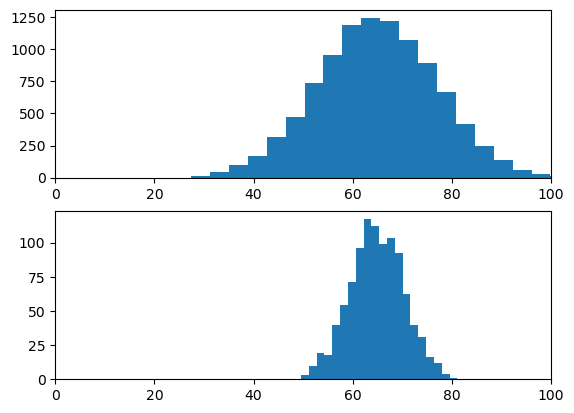

In [6]:
# Place them together to see how the distribution changes as n increases.
import matplotlib.pyplot as plt

plt.subplots(2,1)

plt.subplot(2,1,1)
plt.hist(popln, bins = 20)
plt.xlim(0, 100)


plt.subplot(2,1,2)
plt.hist(sampl, bins = 20)
plt.xlim(0, 100)

plt.show()

#### Hence knowing that the sample mean distribution follows a normal distribution with mean = $\mu$ and $var = \frac{\sigma^2}{n}$, we can use use the distribution to find the answer for Eg.1

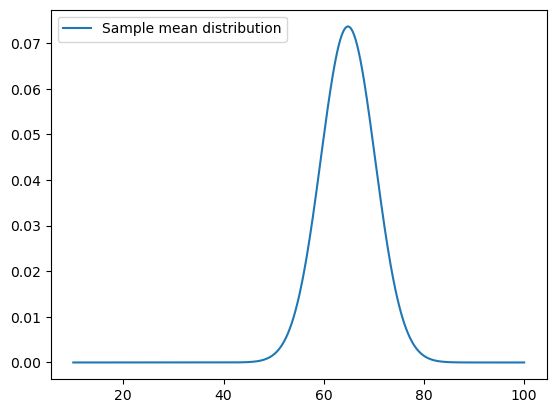

In [7]:
import scipy.stats as st
# Create some continuous variables
cvar = np.linspace(10, 100, 2000)

# Normal Distribution
sampl_dist = st.norm.pdf(cvar, loc=sampl_mean, scale=sampl_sd) # (continuous values, mean, std dev)
plt.plot(cvar,sampl_dist, label="Sample mean distribution")
plt.legend()
plt.show()

In [8]:
p_70 = st.norm.sf(70, loc=sampl_mean, scale=sampl_sd)
print(f"P(X_bar > 70) = {p_70}")
# The answer should be close to ans 0.1757 in slide 26

P(X_bar > 70) = 0.16975341531972643


[Back to top](#contentpage)

<a id="b"></a>
##  2. Central Limit Theorem
What we have seen is a sample mean distribution taken from a Normally distribution. The sample mean distribution is approximately normally distributed. What if the population is not normally distributed?

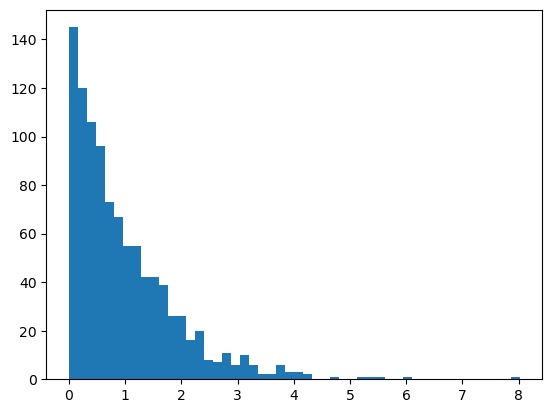

Population mean is 0.981
Population var is 0.862


In [9]:
import numpy as np
import matplotlib.pyplot as plt
expon = np.random.exponential(scale=1, size=1000)
plt.hist(expon, bins=50)
plt.show()
print(f"Population mean is {np.mean(expon):.3f}")
print(f"Population var is {np.var(expon):.3f}")

#### Even though the population is not normally distributed distribution, the sample mean distribution is approximately normal provided the sample size is large enough $n\geq 30$

In [10]:
# Sample size, n = 30 
expon_samp = []
for i in range(1000):
    expon_samp.append(np.mean(np.random.choice(expon,30)))

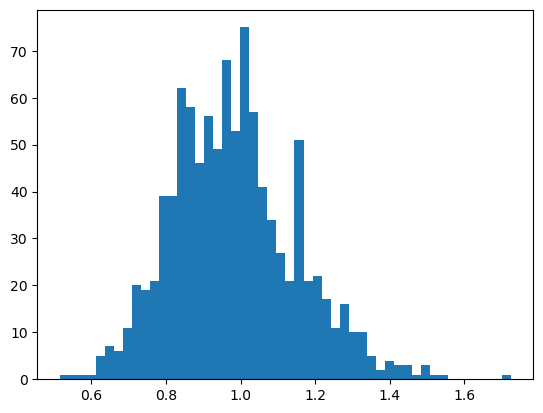

Mean: 0.983
Var: 0.028
Sd: 0.167


In [11]:
plt.hist(expon_samp, bins = 50)
plt.show()
print(f"Mean: {np.mean(expon_samp):.3f}")
print(f"Var: {np.var(expon_samp):.3f}")
print(f"Sd: {np.std(expon_samp):.3f}")

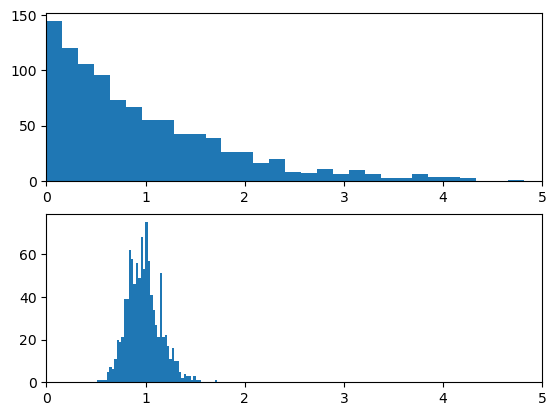

In [12]:
# Plot the exponential population with the sample mean distribution
import matplotlib.pyplot as plt

plt.subplots(2,1)

plt.subplot(2,1,1)
plt.hist(expon, bins = 50)
plt.xlim(0,5)


plt.subplot(2,1,2)
plt.hist(expon_samp, bins = 50)
plt.xlim(0,5)

plt.show()

Since n is at least 30, by Central Limit Theorem, the sample mean distribution approximately follows a normal distribution. Central Limit Theorem allows us to safely assume that the sampling distribution of the mean will be normal. This means that we can take advantage of statistical techniques that assume a normal distribution,

### Standard Error of Mean

In [13]:
import math
# Find the population variance
expon_var = np.var(expon)
print(f"Population var is {expon_var:.3f}")

# Approximate the standard error of the sample mean distribution
se = math.sqrt(expon_var/ 30)
print(f"Estimated std error: {se:.3f}")

# print the standard error from the sample mean distribution
# constructed earlier. Are they similar?
print(f"Std error of sample mean dist: {np.std(expon_samp):.3f}")

Population var is 0.862
Estimated std error: 0.170
Std error of sample mean dist: 0.167


[Back to top](#contentpage)

<a id="c"></a>
##  3. Confidence Intervals (Mean)

Suppose the weight distribution of males is normally distributed. As we do not have the means to weigh all 10000 men in the population, we will do a sample of 30 men and construct a confidence interval.

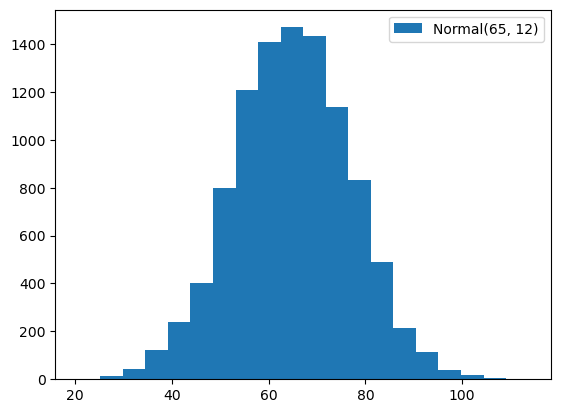

In [14]:
popln = np.random.normal(65,12, 10000)
plt.hist(popln,bins = 20, label="Normal(65, 12)")
plt.legend()
plt.show()

In [15]:
# Record the weights of 30 randomly chosen men
n = 30
samp = np.random.choice(popln,n)

# create 90% confidence interval
# for population mean weight
ci=st.norm.interval(alpha=0.90,
                 loc=np.mean(samp),
                 scale=st.sem(samp))
print(ci)
print(f"The confidence interval is between {ci[0]:.2f} and {ci[1]:.2f} ")

(64.50630381572311, 72.02454765509343)
The confidence interval is between 64.51 and 72.02 


C:\Users\liu nelson\AppData\Local\Temp\ipykernel_4644\2520936814.py:7: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  ci=st.norm.interval(alpha=0.90,


In [16]:
st.sem(samp) # this is sigma/sqrt(n)

2.2853838530618784

In [17]:
popln_mean = np.mean(popln)
print(f"Population mean: {popln_mean}")

Population mean: 64.91672900133842


In [18]:
if(ci[0] <= popln_mean<=ci[1]):
    print(f"The confidence interval captures the population mean 90% of the time.")
else:
    print(f"10% of the confidence intervals do not capture the population mean")

The confidence interval captures the population mean 90% of the time.


#### (a) What is the 95% confidence interval for the sample above? Would it capture a larger or smaller range of values?
#### (b) Construct the 95% confidence interval manually

In [19]:
# Ans (a): The 95% confidence interval would contain a larger range of values
# create 95% confidence interval
# for population mean weight
st.norm.interval(alpha=0.95,
                 loc=np.mean(samp),
                 scale=st.sem(samp))

C:\Users\liu nelson\AppData\Local\Temp\ipykernel_4644\1013526058.py:4: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.norm.interval(alpha=0.95,


(63.786155692557614, 72.74469577825893)

In [20]:
# Ans (b): 
samp_mean = np.mean(samp)
samp_sd = np.std(samp, ddof = 1)
z_value = st.norm.ppf(0.975,0,1) # the middle part of a 95% CI is 95% + 2.5% left tail
ci_low = samp_mean - z_value*((samp_sd/math.sqrt(n)))
ci_high = samp_mean + z_value*((samp_sd/math.sqrt(n)))
print(f"Confidence Interval: {ci_low} to {ci_high}")

# Note: Both calculations give you the standard error of mean
# st.sem(samp)
# samp_sd/math.sqrt(n)

Confidence Interval: 63.786155692557614 to 72.74469577825893


#### The length of time, x hours, that each Singaporean spent on screentime each week is measured for a random sample of 100 people. 
#### (i) Find the unbiased estimate of mean and variance.
#### (ii) Find a symmetric 95% confidence interval for mean.	


In [21]:
import pandas as pd
screentime = pd.read_csv("./data/screentime.csv")
screentime.head()

,Hrs of screentime
0,9.600615
1,6.207392
2,8.236383
3,3.438483
4,8.927363


In [22]:
# Ans (i):
mean = np.mean(screentime["Hrs of screentime"])

print(f"The mean screentime: {mean}")

variance = np.var(screentime["Hrs of screentime"], ddof = 1)
print(f"The variance amt of screentime: {variance}")

The mean screentime: 9.088766367080002
The variance amt of screentime: 6.238941560073069


In [23]:
# Ans (ii): find a 95% symmetric confidence interval
# create 95% confidence interval for the hours of screentime
ci=st.norm.interval(alpha=0.95,
                 loc=mean,
                 scale=st.sem(screentime["Hrs of screentime"]))
print(ci)
print(f"The confidence interval is between {ci[0]:.2f} and {ci[1]:.2f} ")

(8.599209045740224, 9.578323688419779)
The confidence interval is between 8.60 and 9.58 


C:\Users\liu nelson\AppData\Local\Temp\ipykernel_4644\102367576.py:3: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  ci=st.norm.interval(alpha=0.95,


In [24]:
# mean = 908.8766/100 = 9.088766
# sum of x = 908.8766
# std dev sample = 2.497787
# std error = 0.24977
# manual calculation
import math
samp_mean = 9.088766
samp_sd = 2.497787

z_value = st.norm.ppf(0.975,0,1) # the middle part of a 95% CI is 95% + 2.5% left tail
ci_low = samp_mean - z_value*((samp_sd/math.sqrt(100)))
ci_high = samp_mean + z_value*((samp_sd/math.sqrt(100)))
print(f"Confidence Interval: {ci_low} to {ci_high}")

Confidence Interval: 8.599208743894765 to 9.578323256105234


[Back to top](#contentpage)

<a id="d"></a>
##  4. Confidence Interval (Small Samples)

In [25]:
# A random sample of 15 customers is taken, and the amounts spent recorded
ss = [35,40,44,44.7,45,46,46.5,47,49.8,49.9,52,51.3,54,55,55.5]
n = len(ss)
ss_mean = np.mean(ss) 
ss_sd = np.std(ss, ddof = 1)
print(n,ss_mean, ss_sd)

15 47.71333333333333 5.668820319036739


In [26]:
# create 95% confidence interval
st.t.interval(alpha=0.95,
              df=len(ss)-1,
              loc=np.mean(ss), 
              scale=st.sem(ss))

C:\Users\liu nelson\AppData\Local\Temp\ipykernel_4644\2437170165.py:2: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.95,


(44.5740452782042, 50.85262138846246)

[Back to top](#contentpage)

<a id="e"></a>
##  5. Confidence Interval (proportion)

There are thousands of runners taking part in a race and we want to know the proportion of males. 

In [27]:
# population data
import pandas as pd
runners = pd.read_csv("./data/runners.csv")
runners.head()

,Unnamed: 0,Name,Age,Country,Sex,FinishingTime
0,1,"Desisa, Lelisa",25,ETH,M,129
1,2,"Tsegay, Yemane Adhane",30,ETH,M,129
2,3,"Chebet, Wilson",29,KEN,M,130
3,4,"Kipyego, Bernard",28,KEN,M,130
4,5,"Korir, Wesley",32,KEN,M,130


Assume we only managed to randomly sample 1000 runners, to make an inference about the population proportion of male runers. Determine the unbiased estimator of population proportion ($\hat{p}$) and the 90% confidence interval given by: <br>
$\hat{p} \pm$ $z * \sqrt{\frac{\hat{p}\hat{q}}{n}}$

In [28]:
import random
# randomly sample 1000 data from the dataset. random state for reproducibility
rsamp = runners.sample(1000, random_state = 1)
rsamp.head()


,Unnamed: 0,Name,Age,Country,Sex,FinishingTime
838,839,"Bilbrey, Eric",31,USA,M,169
22851,22852,"Bunston, Stanley",68,CAN,M,269
24722,24723,"Arsenault, Ryan",30,USA,M,296
7459,7460,"Buitrago, Fredy J",41,USA,M,201
22884,22885,"Hanrahan, Colleen",25,USA,F,269


In [29]:
males = rsamp[(rsamp['Sex']=="M")]
X = len(rsamp[(rsamp['Sex']=="M")])
n = len(rsamp)
print(X)
print(n)

559
1000


In [30]:
from statsmodels.stats.proportion import proportion_confint
# calculate a 90% confidence interval
proportion_confint(count=X,    # Number of "successes" or males
                   nobs=n,    # Number of trials = 1000
                   alpha=(1 - 0.9))

(0.5331742789692109, 0.5848257210307892)

In [31]:
# the breakdown of runners by gender
runners['Sex'].value_counts() # p = 0.548

M    14581
F    12017
Name: Sex, dtype: int64

In [32]:
prop_m = runners['Sex'].value_counts(normalize=True) * 100
print(f"The actual proportion of male runners is {prop_m[0]:.2f}")

The actual proportion of male runners is 54.82


[Back to top](#contentpage)